In [18]:
import analyst as aiam

In [3]:
question = "What are the top 10 highest runtime movies from 2024?"
sql = ''
with open("generated_sql.sql", "r") as file:
    sql = file.read()
db = aiam.create_db_connection()
df = db.query_to_dataframe(sql)
db.close()

Connection established.
Connection closed.


In [4]:
python_model = "ise-uiuc/Magicoder-S-DS-6.7B"
python_pipeline = aiam.get_model_pipeline(python_model)

`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Device set to use cuda:0


In [19]:
python_prompt = aiam.construct_python_prompt(df, question, sql, avoid_cols=['tconst', 'nconst', 'titleid'])
print(python_prompt)

TypeError: construct_python_prompt() got an unexpected keyword argument 'avoid_cols'

In [16]:
python = aiam.run_inference(python_pipeline, python_prompt, task_type='python')
print(python)

def plot_df(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['tconst'], df['runtimeminutes'])
    plt.xlabel('tconst')
    plt.ylabel('runtimeminutes')
    plt.title('Scatter plot of runtimeminutes vs tconst')
    plt.show()


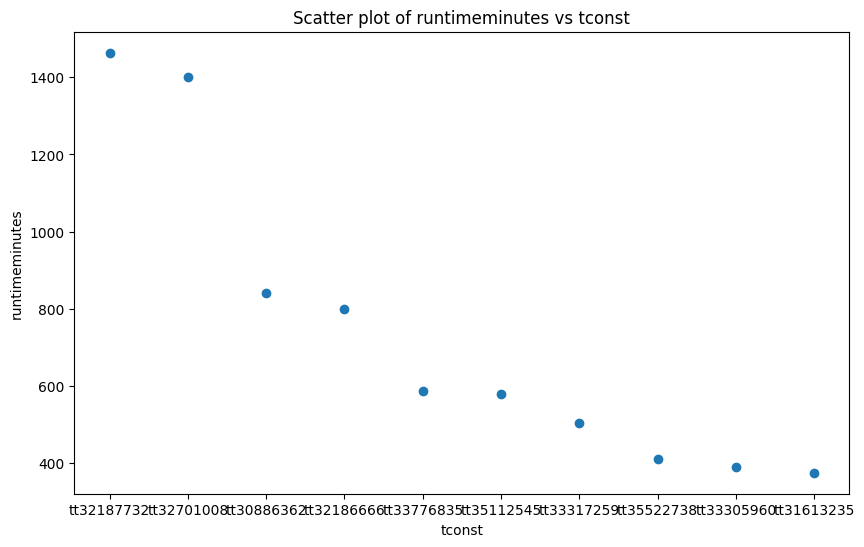

In [17]:
aiam.execute_python_code(python, df)